In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tesco=pd.read_excel("/Users/niharikadeokar/Desktop/ECOZE/data/tesco.xlsx")
tesco.head()

,name,image,price,description,department,aisle,shelf,recycling_information
0,Cadbury Christmas Snow Cake Bar 5 Pack,https://digitalcontent.api.tesco.com/v2/media/...,NaN,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...
1,New York Bakery Bagel Thins The Original 4 Pack,https://digitalcontent.api.tesco.com/v2/media/...,£1.20,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN
2,Tesco Finest 4 Buttermilk Pancakes,https://digitalcontent.api.tesco.com/v2/media/...,NaN,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket
3,Mission Deli Wheat & White Wraps 6 Pack 367G,https://digitalcontent.api.tesco.com/v2/media/...,NaN,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN
4,Tesco Multiseed Batch 800G,https://digitalcontent.api.tesco.com/v2/media/...,NaN,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket


In [3]:
tesco['recycling_information'] = tesco['recycling_information'].fillna('No Info')

recycling_counts = tesco['recycling_information'].value_counts()

In [4]:
print(recycling_counts)
print(len(recycling_counts))

No Info                                                                                                   15995
Pack. Recycle                                                                                               748
Bag. Recycle at large supermarket                                                                           357
Film. Recycle at large supermarket                                                                          348
Pack. Don't Recycle                                                                                         327
                                                                                                          ...  
Box. Recycle Film. Recycle with bags at large supermarket - Don't recycle at home Pouch. Don't Recycle        1
Lid. Don't Recycle Pot. Recycle Tray. Recycle                                                                 1
Bag. Not Recyclable Box. Recyclable                                                                     

In [5]:
#creating a graph like this is not advisable as there are 957 types of recylcing types.  
'''
plt.figure(figsize=(10, 5))
recycling_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Frequency of Recycling Information')
plt.xlabel('Recycling Information')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
'''

"\nplt.figure(figsize=(10, 5))\nrecycling_counts.plot(kind='bar', color='mediumseagreen')\nplt.title('Frequency of Recycling Information')\nplt.xlabel('Recycling Information')\nplt.ylabel('Number of Products')\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()\n"

In [ ]:
#lets try a new method that categorises the products into several recycling categories

tesco['recycling_information'] = tesco['recycling_information'].fillna('No Info')
info = tesco['recycling_information'].str.lower()

a = info.str.contains("don't recycle") | info.str.contains("not currently recycled")
b = info.str.contains("don't recycle at home") | info.str.contains("recycle at large supermarket")
c = a & ~b

tesco['recycle_category'] = 'Recyclable'  
tesco.loc[b, 'recycle_category'] = "Don't Recycle at Home"
tesco.loc[c, 'recycle_category'] = "Don't Recycle"


In [7]:
tesco.head()

,name,image,price,description,department,aisle,shelf,recycling_information,recycle_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,https://digitalcontent.api.tesco.com/v2/media/...,NaN,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,Don't Recycle at Home
1,New York Bakery Bagel Thins The Original 4 Pack,https://digitalcontent.api.tesco.com/v2/media/...,£1.20,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,No Info,Recyclable
2,Tesco Finest 4 Buttermilk Pancakes,https://digitalcontent.api.tesco.com/v2/media/...,NaN,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,Don't Recycle at Home
3,Mission Deli Wheat & White Wraps 6 Pack 367G,https://digitalcontent.api.tesco.com/v2/media/...,NaN,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,No Info,Recyclable
4,Tesco Multiseed Batch 800G,https://digitalcontent.api.tesco.com/v2/media/...,NaN,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,Don't Recycle at Home


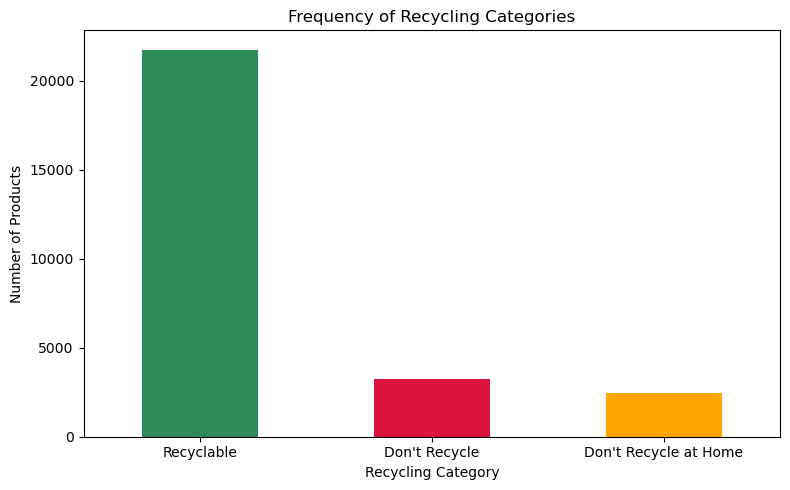

In [8]:
category_counts = tesco['recycle_category'].value_counts()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['seagreen', 'crimson', 'orange'])

plt.title('Frequency of Recycling Categories')
plt.xlabel('Recycling Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [9]:
#calculating the frequency of shelf item types

tesco['shelf'] = tesco['shelf'].fillna('No Info')
shelf_counts = tesco['shelf'].value_counts()
print(shelf_counts)
print(len(shelf_counts))

Gift Sets                          360
Face Cream & Moisturiser           300
Permanent Hair Dye                 284
Hair Accessories                   272
Shower                             264
                                  ... 
Toddler Wipes                        1
Candle Lightbulbs                    1
2-4 Roll                             1
Tableware                            1
Vegan & Vegetarian Alternatives      1
Name: shelf, Length: 863, dtype: int64
863


In [10]:
#since the number of shelf types are also a lot to map on a graph, department types are being counted below

tesco['department'] = tesco['department'].fillna('No Info')
dept_counts = tesco['department'].value_counts()
print(dept_counts)
print(len(dept_counts))

Health & Beauty    7973
Fresh Food         6149
Food Cupboard      5800
Drinks             3033
Household           984
Frozen Food         958
Baby & Toddler      865
Pets                708
Bakery              695
Home & Ents         223
Treats & Snacks      69
No Info              11
Christmas             2
Name: department, dtype: int64
13


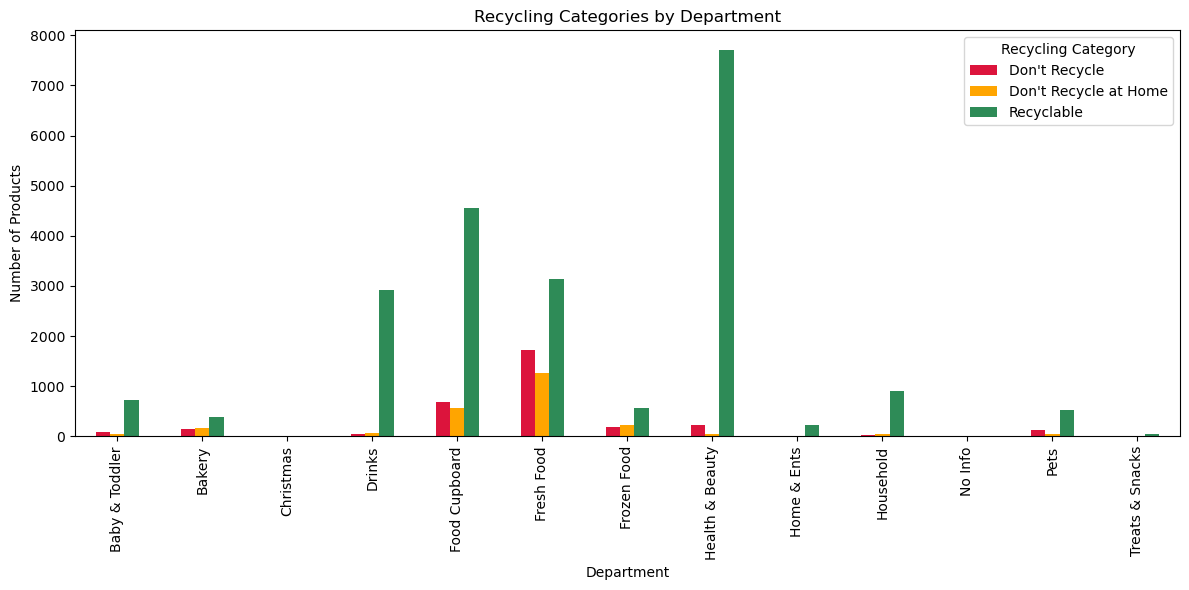

In [11]:
grouped = tesco.groupby(['department', 'recycle_category']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['crimson', 'orange', 'seagreen'])

plt.title('Recycling Categories by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.legend(title='Recycling Category')
plt.tight_layout()
plt.show()

In [12]:
#it is difficult to make a comparison between prices and the recycling information as the price might vary due to the 
# origin ingredients variation in prices and might have nothing to do with the carbon footprint

In [13]:
#now that recycling information has been visualised lets visualied the carbon footprint of the
#  most used products on the market (data provided in the Excel: all_info)

In [ ]:
most_used=pd.read_excel()